## Applying model for car price prediction page

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Engage\pre_processed_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [4]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Kerb_Weight,Cylinders,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Power,Torque,Type,Odometer,Speedometer,Tachometer,Seating_Capacity,Start_/_Stop_Button,Audiosystem,Aux-in_Compatibility,Basic_Warranty,Bluetooth,12v_Power_Outlet,Boot-lid_Opener,Boot_Space,Child_Safety_Locks,Extended_Warranty,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Hill_Assist,Airbags,Number_of_Airbags,Parking_Assistance,Infotainment_Screen,Navigation_System,Third_Row_AC_Vents,Second_Row_AC_Vents,Engine_Type,Rain_Sensing_Wipers
0,0,Tata,Nano Genx,Xt,292667.0,624.0,660.0,2.0,BS IV,24.0,Petrol,Hatchback,5.0,23.6,4,180.0,38PS@5500rpm,51Nm@4000rpm,Manual,Digital,Analog,Not on offer,4.0,Yes,CD Player with USB & Aux-in,Yes,2 years /75000 Kms,Yes,Yes,Internal,110.0,Yes,2 years /150000 Kms,Internal,Digital,Manual,Not Applicable,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not known,Not Applicable
1,1,Tata,Nano Genx,Xe,236447.0,624.0,725.0,2.0,BS IV,24.0,Petrol,Hatchback,5.0,23.6,4,180.0,38PS@5500rpm,51Nm@4000rpm,Manual,Digital,Analog,Not on offer,4.0,Not Applicable,Not on offer,Not Applicable,2 years /75000 Kms,Not Applicable,Yes,Internal,110.0,Yes,2 years /150000 Kms,Internal,Digital,Manual,Not Applicable,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not known,Not Applicable
2,2,Tata,Nano Genx,Emax Xm,296661.0,624.0,710.0,2.0,BS IV,15.0,CNG,Hatchback,4.0,23.6,4,180.0,38PS@5500rpm,51Nm@4000rpm,Manual,Digital,Analog,Not on offer,4.0,Not Applicable,Not on offer,Not Applicable,2 years /75000 Kms,Not Applicable,Yes,Internal,110.0,Yes,2 years /150000 Kms,Internal,Digital,Manual,Yes,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not known,Not Applicable
3,3,Tata,Nano Genx,Xta,334768.0,624.0,725.0,2.0,BS IV,24.0,Petrol,Hatchback,5.0,21.9,5,180.0,38PS@5500rpm,51Nm@4000rpm,Automatic,Digital,Analog,Not on offer,4.0,Yes,CD Player with USB & Aux-in,Yes,2 years /75000 Kms,Yes,Yes,Internal,94.0,Yes,2 years /150000 Kms,Internal,Digital,Manual,Not Applicable,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not known,Not Applicable
4,4,Tata,Nano Genx,Xm,272223.0,624.0,725.0,2.0,BS IV,24.0,Petrol,Hatchback,5.0,23.6,4,180.0,38PS@5500rpm,51Nm@4000rpm,Manual,Digital,Analog,Not on offer,4.0,Not Applicable,Not on offer,Not Applicable,2 years /75000 Kms,Not Applicable,Yes,Internal,110.0,Yes,2 years /150000 Kms,Internal,Digital,Manual,Not Applicable,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not known,Not Applicable


In [5]:
df=df.drop(columns=['Unnamed: 0'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1276 non-null   object 
 1   Model                   1276 non-null   object 
 2   Variant                 1276 non-null   object 
 3   Ex-Showroom_Price       1276 non-null   float64
 4   Displacement            1276 non-null   float64
 5   Kerb_Weight             1276 non-null   float64
 6   Cylinders               1276 non-null   float64
 7   Emission_Norm           1276 non-null   object 
 8   Fuel_Tank_Capacity      1276 non-null   float64
 9   Fuel_Type               1276 non-null   object 
 10  Body_Type               1276 non-null   object 
 11  Doors                   1276 non-null   float64
 12  ARAI_Certified_Mileage  1276 non-null   float64
 13  Gears                   1276 non-null   object 
 14  Ground_Clearance        1276 non-null   

In [7]:
df2= df

In [8]:
df2.columns
# dimensionality reduction based on what is necessary and what not

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Kerb_Weight', 'Cylinders', 'Emission_Norm', 'Fuel_Tank_Capacity',
       'Fuel_Type', 'Body_Type', 'Doors', 'ARAI_Certified_Mileage', 'Gears',
       'Ground_Clearance', 'Power', 'Torque', 'Type', 'Odometer',
       'Speedometer', 'Tachometer', 'Seating_Capacity', 'Start_/_Stop_Button',
       'Audiosystem', 'Aux-in_Compatibility', 'Basic_Warranty', 'Bluetooth',
       '12v_Power_Outlet', 'Boot-lid_Opener', 'Boot_Space',
       'Child_Safety_Locks', 'Extended_Warranty', 'Fuel-lid_Opener',
       'Fuel_Gauge', 'Handbrake', 'Hill_Assist', 'Airbags',
       'Number_of_Airbags', 'Parking_Assistance', 'Infotainment_Screen',
       'Navigation_System', 'Third_Row_AC_Vents', 'Second_Row_AC_Vents',
       'Engine_Type', 'Rain_Sensing_Wipers'],
      dtype='object')

In [9]:
df2.drop(columns= ['Variant','Displacement','Kerb_Weight','Cylinders','Emission_Norm','Fuel_Tank_Capacity','Doors'], inplace=True)
df2.drop(columns=['Power', 'Torque', 'Type', 'Odometer','Speedometer', 'Tachometer','Speedometer', 'Tachometer'], inplace=True)
df2.drop(columns=['Bluetooth','12v_Power_Outlet', 'Boot-lid_Opener', 'Boot_Space','Fuel-lid_Opener','Fuel_Gauge'], inplace=True)
df2.drop(columns=['Hill_Assist', 'Airbags','Infotainment_Screen','Third_Row_AC_Vents', 'Second_Row_AC_Vents','Engine_Type', 'Rain_Sensing_Wipers','Ground_Clearance'], inplace=True)

In [10]:
df2.drop(columns=['Gears','Audiosystem', 'Aux-in_Compatibility','Handbrake'], inplace=True)

In [11]:
df2.head(1)

,Make,Model,Ex-Showroom_Price,Fuel_Type,Body_Type,ARAI_Certified_Mileage,Seating_Capacity,Start_/_Stop_Button,Basic_Warranty,Child_Safety_Locks,Extended_Warranty,Number_of_Airbags,Parking_Assistance,Navigation_System
0,Tata,Nano Genx,292667.0,Petrol,Hatchback,23.6,4.0,Yes,2 years /75000 Kms,Yes,2 years /150000 Kms,0.0,Not Applicable,Not Applicable


<AxesSubplot:>

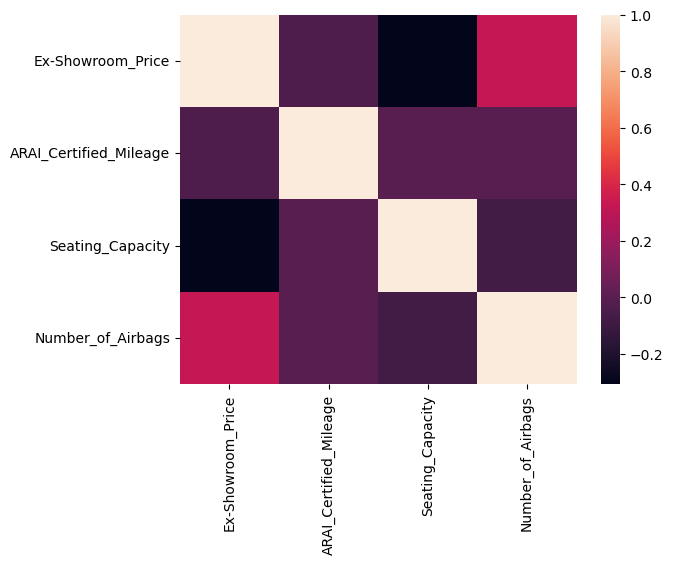

In [12]:
sns.heatmap(df2.corr())

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ex-Showroom_Price', ylabel='Density'>

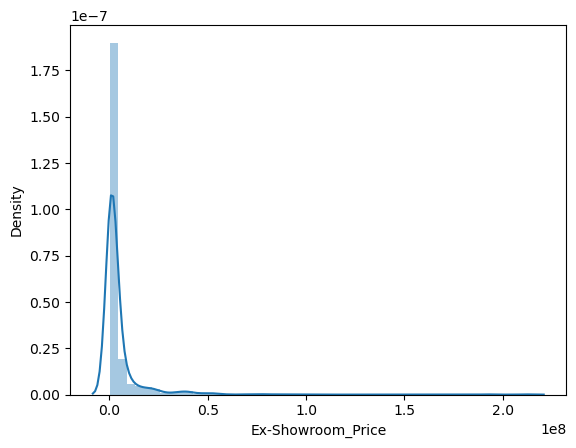

In [13]:
sns.distplot(df2['Ex-Showroom_Price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ex-Showroom_Price', ylabel='Density'>

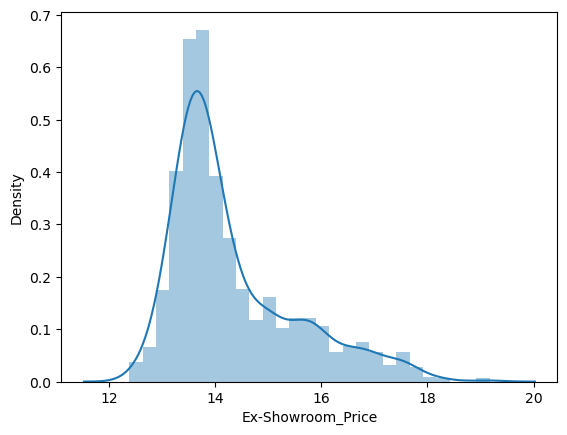

In [14]:
sns.distplot(np.log(df2['Ex-Showroom_Price'])) #we can see that there is skewness in data and therefore we did log transformation

We are taking Ex-Showroom_Price as output variable and all the other features as input. Since input and output have continuous value, this make it a regression problem.

In [15]:
X = df2.drop(columns=['Ex-Showroom_Price'])
y= np.log(df2['Ex-Showroom_Price'])

In [16]:
X.head()

,Make,Model,Fuel_Type,Body_Type,ARAI_Certified_Mileage,Seating_Capacity,Start_/_Stop_Button,Basic_Warranty,Child_Safety_Locks,Extended_Warranty,Number_of_Airbags,Parking_Assistance,Navigation_System
0,Tata,Nano Genx,Petrol,Hatchback,23.6,4.0,Yes,2 years /75000 Kms,Yes,2 years /150000 Kms,0.0,Not Applicable,Not Applicable
1,Tata,Nano Genx,Petrol,Hatchback,23.6,4.0,Not Applicable,2 years /75000 Kms,Yes,2 years /150000 Kms,0.0,Not Applicable,Not Applicable
2,Tata,Nano Genx,CNG,Hatchback,23.6,4.0,Not Applicable,2 years /75000 Kms,Yes,2 years /150000 Kms,0.0,Not Applicable,Not Applicable
3,Tata,Nano Genx,Petrol,Hatchback,21.9,4.0,Yes,2 years /75000 Kms,Yes,2 years /150000 Kms,0.0,Not Applicable,Not Applicable
4,Tata,Nano Genx,Petrol,Hatchback,23.6,4.0,Not Applicable,2 years /75000 Kms,Yes,2 years /150000 Kms,0.0,Not Applicable,Not Applicable


In [17]:
y

0       12.586791
1       12.373479
2       12.600345
3       12.721193
4       12.514377
          ...    
1271    14.079412
1272    14.166871
1273    14.173884
1274    13.998665
1275    15.741591
Name: Ex-Showroom_Price, Length: 1276, dtype: float64

In [18]:
# splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=2)

In [19]:
X_train.head()

,Make,Model,Fuel_Type,Body_Type,ARAI_Certified_Mileage,Seating_Capacity,Start_/_Stop_Button,Basic_Warranty,Child_Safety_Locks,Extended_Warranty,Number_of_Airbags,Parking_Assistance,Navigation_System
944,Honda,Wr-V,Diesel,SUV,25.50,5.0,Yes,3 years without mileage limit,Yes,3 Years Unlimited Kilometres,2.0,Rear sensors,Not Applicable
21,Renault,Kwid,Petrol,Hatchback,23.01,5.0,Not Applicable,2 years /50000 Kms,Yes,2 Years Unlimited Kilometres,2.0,Rear sensors with camera,Not Applicable
530,Fiat,Linea,Diesel,Sedan,20.40,5.0,Not Applicable,3 years /100000 Kms,Yes,2 years /150000 Kms,2.0,Not Applicable,Not Applicable
279,Jaguar,Xe,Petrol,Sedan,11.00,5.0,Yes,2 years without mileage limit,Yes,3rd/4th year,6.0,Front & rear sensors with 360 degree view,Yes
398,Mahindra,Kuv100 Nxt,Diesel,Hatchback,25.32,6.0,Not Applicable,2 years /100000 Kms,Yes,Up to 5 Year /,2.0,Not Applicable,Not Applicable


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

## LinearRegression

In [22]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')
# [0,1,3,4,7,8,9,10,12,13]
step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8767678916838493
MAE 0.18158785768888375


## Ridge Regression

In [23]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8773468586808513
MAE 0.2550525448566288


## Lasso regression

In [24]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8453294339974216
MAE 0.24088842644348438


## KNeighborsRegressor

In [25]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9311776222035469
MAE 0.1912951382382296


## DecisionTreeRegressor

In [26]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9023261967020089
MAE 0.2544752230288523


## SVR

In [27]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.09)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9299192277930857
MAE 0.15872913418398296


## RandomForestRegressor

In [28]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9257534025573801
MAE 0.18430125411813378


## AdaBoostRegressor

In [29]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8333100816169967
MAE 0.37133085723894227


## GradientBoostingRegressor

In [30]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9258303983173126
MAE 0.177070767130149


Since KNeighborsRegressor has maximum R2 score i.e accuracy of 93.11% so run this pipeline at last once again

In [31]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,6,7,8,9,11,12])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9311776222035469
MAE 0.1912951382382296


In [32]:
# exporting the model
import pickle
pickle.dump(df2,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [33]:
X_train.head(1)

,Make,Model,Fuel_Type,Body_Type,ARAI_Certified_Mileage,Seating_Capacity,Start_/_Stop_Button,Basic_Warranty,Child_Safety_Locks,Extended_Warranty,Number_of_Airbags,Parking_Assistance,Navigation_System
944,Honda,Wr-V,Diesel,SUV,25.5,5.0,Yes,3 years without mileage limit,Yes,3 Years Unlimited Kilometres,2.0,Rear sensors,Not Applicable
